In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = "/content/drive/MyDrive/Projects/Potato/PLD_3_Classes_256/Training"
x=[]
y=[]
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x.append(image)
        y.append(direct)

Loading dataset training Early_Blight
Loading dataset training Late_Blight
Loading dataset training Healthy


In [ ]:
dir_val = "/content/drive/MyDrive/Projects/Potato/PLD_3_Classes_256/Validation"
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation Healthy
Loading dataset validation Late_Blight
Loading dataset validation Early_Blight


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
int_labels = le.fit_transform(y)
encode_label = to_categorical(int_labels)

# Now, encoded_labels contains the one-hot encoded representation of your labels


In [ ]:
print(int_labels)

[0 0 0 ... 1 1 1]


In [ ]:
print(encode_label)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
int_labels_val = le.fit_transform(y_val)
encode_label_val = to_categorical(int_labels_val)

# Now, encoded_labels_val contains the one-hot encoded representation of your validation labels


In [ ]:
x = np.array(x)

In [ ]:
x_val = np.array(x_val)

In [ ]:
from sklearn.utils import shuffle
x,encode_label = shuffle(x,encode_label)
x_val,encode_label_val = shuffle(x_val,encode_label_val)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,encode_label,test_size=0.2)

In [ ]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
encode_label_val = np.array([np.array(i) for i in encode_label_val])

In [ ]:
print(Y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
ops.reset_default_graph()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_95 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_94 (Ba  (None, 16, 16, 64)        256       
 tchNormalization)                                               
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dropout_1 (Dropout)         (None, 16384)             0

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(x_val,encode_label_val),batch_size=32,epochs=10,callbacks=callbacks)

Epoch 1/10
81/82 [============================>.] - ETA: 0s - loss: 1.1227 - accuracy: 0.5644
Epoch 1: val_loss improved from inf to 1.06092, saving model to my_best_model.hdf5
82/82 [==============================] - 5s 18ms/step - loss: 1.1221 - accuracy: 0.5646 - val_loss: 1.0609 - val_accuracy: 0.4567
Epoch 2/10
 5/82 [>.............................] - ETA: 1s - loss: 0.8237 - accuracy: 0.6625

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


78/82 [===========================>..] - ETA: 0s - loss: 0.7482 - accuracy: 0.6811
Epoch 2: val_loss improved from 1.06092 to 1.01756, saving model to my_best_model.hdf5
82/82 [==============================] - 1s 12ms/step - loss: 0.7498 - accuracy: 0.6773 - val_loss: 1.0176 - val_accuracy: 0.3942
Epoch 3/10
78/82 [===========================>..] - ETA: 0s - loss: 0.6126 - accuracy: 0.7464
Epoch 3: val_loss improved from 1.01756 to 0.88423, saving model to my_best_model.hdf5
82/82 [==============================] - 1s 12ms/step - loss: 0.6099 - accuracy: 0.7473 - val_loss: 0.8842 - val_accuracy: 0.7236
Epoch 4/10
79/82 [===========================>..] - ETA: 0s - loss: 0.5064 - accuracy: 0.8097
Epoch 4: val_loss improved from 0.88423 to 0.86233, saving model to my_best_model.hdf5
82/82 [==============================] - 1s 16ms/step - loss: 0.5097 - accuracy: 0.8092 - val_loss: 0.8623 - val_accuracy: 0.6442
Epoch 5/10
78/82 [===========================>..] - ETA: 0s - loss: 0.4374 - a

In [ ]:
model.save("my_model")

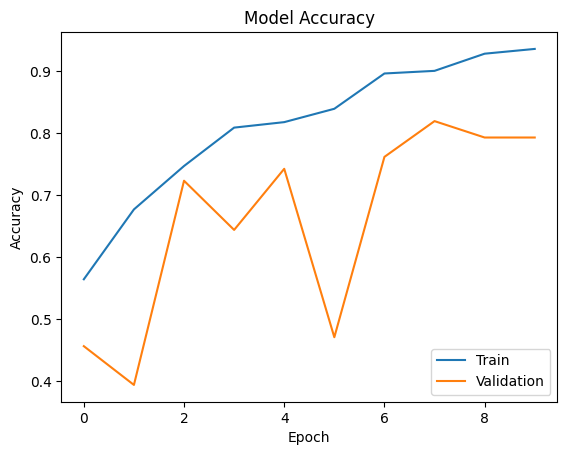

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

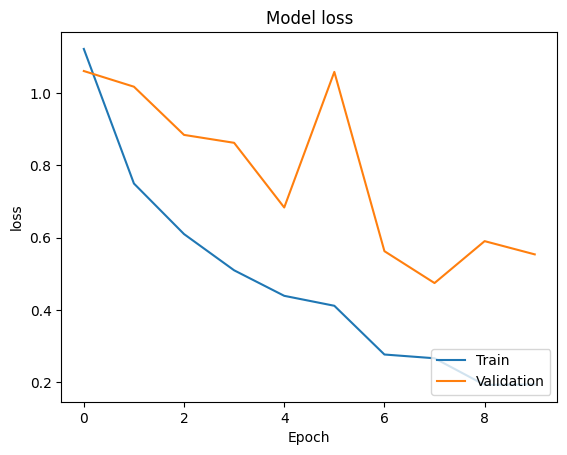

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

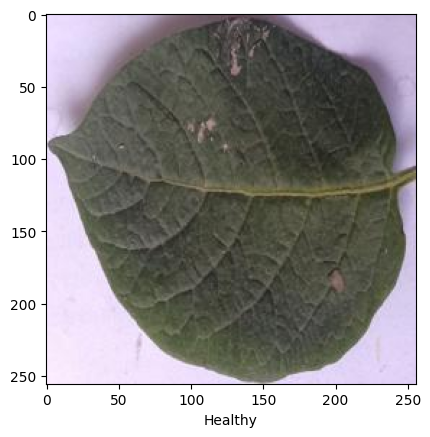

In [ ]:
import matplotlib.image as mping
test_img_path = "/content/drive/MyDrive/Projects/Potato/PLD_3_Classes_256/Testing/Healthy/Healthy_11.jpg"
img = mping.imread(test_img_path)
imgplot = plt.imshow(img)
plt.xlabel("Healthy")
plt.show()

In [ ]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)

In [ ]:
print(test_arr)

[array([[[[1.        , 0.87058824, 0.92941176],
         [0.99607843, 0.86666667, 0.9254902 ],
         [0.99215686, 0.85098039, 0.91372549],
         ...,
         [0.84705882, 0.70196078, 0.76470588],
         [0.85882353, 0.71764706, 0.78039216],
         [0.85098039, 0.70980392, 0.77254902]],

        [[1.        , 0.87843137, 0.9372549 ],
         [0.99215686, 0.8627451 , 0.92156863],
         [0.99607843, 0.85490196, 0.91764706],
         ...,
         [0.8627451 , 0.71764706, 0.78039216],
         [0.8627451 , 0.72156863, 0.78431373],
         [0.8745098 , 0.73333333, 0.79607843]],

        [[1.        , 0.8745098 , 0.9372549 ],
         [0.99215686, 0.85098039, 0.91372549],
         [0.98823529, 0.85490196, 0.89803922],
         ...,
         [0.85490196, 0.70980392, 0.77254902],
         [0.87058824, 0.7254902 , 0.78823529],
         [0.86666667, 0.72156863, 0.78431373]],

        ...,

        [[0.99607843, 0.92156863, 0.98039216],
         [0.98823529, 0.91372549, 0.97254902

In [ ]:
model.predict(test_arr) #From this we can conclude that the prediction shows the leaf hash Late Blight disease!!


1/1 [==============================] - 0s 115ms/step


array([[0.09810478, 0.38181767, 0.5200775 ]], dtype=float32)

In [ ]:
import os
import glob
import numpy as np
import pandas as pd


from pprint import pprint

import tensorflow as tf

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, layers, Sequential, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights.h5

--2023-12-04 20:53:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.207, 74.125.203.207, 74.125.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights.h5’

inception_v3_weight 100%[===================>]  83.84M  26.5MB/s    in 3.7s    

2023-12-04 20:53:46 (22.6 MB/s) - ‘inception_v3_weights.h5’ saved [87910968/87910968]



In [ ]:
local_weights_file = './inception_v3_weights.h5'

In [ ]:
train_path = "/content/drive/MyDrive/Projects/Potato/PLD_3_Classes_256/Training"
test_path = "/content/drive/MyDrive/Projects/Potato/PLD_3_Classes_256/Testing"
valid_path = "/content/drive/MyDrive/Projects/Potato/PLD_3_Classes_256/Validation"

In [ ]:
training_images = []

for root, dirs, files in os.walk(train_path):
    for file in files:
        training_images.append(os.path.join(root, file))

validation_images = []

for root, dirs, files in os.walk(valid_path):
    for file in files:
        validation_images.append(os.path.join(root, file))

test_images = []

for root, dirs, files in os.walk(test_path):
    for file in files:
        test_images.append(os.path.join(root, file))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
batch_size = 32

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size = batch_size,
    class_mode = 'categorical',
    target_size = (150, 150),
    color_mode="rgb",
    shuffle=True
)

validation_generator =  validation_datagen.flow_from_directory(
    valid_path,
    batch_size  = batch_size,
    class_mode  = 'categorical',
    target_size = (150, 150),
    color_mode="rgb",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    batch_size  = 1,
    class_mode  = None,
    target_size = (150, 150),
    color_mode="rgb",
    shuffle=False
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [ ]:
class_dict = train_generator.class_indices
pprint(class_dict)

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}


In [ ]:
class_list = list(class_dict.keys())
pprint(class_list)

['Early_Blight', 'Healthy', 'Late_Blight']


In [ ]:
train_num = train_generator.samples
valid_num = validation_generator.samples

In [ ]:
inception_model = InceptionV3(input_shape= (150, 150, 3),
                                include_top = False,
                                weights = None)

In [ ]:
local_weights_file

'./inception_v3_weights.h5'

In [ ]:
for layer in inception_model.layers:
    layer.trainable = False
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
last_layer = inception_model.get_layer('mixed9')
print('Last Layer Output Shape:', last_layer.output_shape)
last_output = last_layer.output

Last Layer Output Shape: (None, 3, 3, 2048)


In [ ]:
# Adding our own layers at the end of Inception Network

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(2048, activation='relu')(x)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(len(class_dict), activation='softmax')(x)

model = Model(inception_model.input, x)
#model = tf.keras.models.load_model("../input/saved-model/saved_model.h5")

In [ ]:
ACCURACY_THRESHOLD = 0.8

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True



model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch=train_num//batch_size,
    validation_data = validation_generator,
    validation_steps=valid_num//batch_size,
    epochs = 200,
    callbacks=[callbacks],
    verbose = 1
)

Epoch 1/200
101/101 [==============================] - 35s 302ms/step - loss: 1.0805 - accuracy: 0.3948 - val_loss: 1.0730 - val_accuracy: 0.3918
Epoch 2/200
101/101 [==============================] - 30s 300ms/step - loss: 1.0676 - accuracy: 0.3995 - val_loss: 1.0551 - val_accuracy: 0.4399
Epoch 3/200
101/101 [==============================] - 30s 292ms/step - loss: 1.0353 - accuracy: 0.4458 - val_loss: 1.0233 - val_accuracy: 0.4327
Epoch 4/200
101/101 [==============================] - 30s 294ms/step - loss: 0.9848 - accuracy: 0.4995 - val_loss: 0.9334 - val_accuracy: 0.5649
Epoch 5/200
101/101 [==============================] - 29s 292ms/step - loss: 0.9690 - accuracy: 0.5412 - val_loss: 0.9430 - val_accuracy: 0.5577
Epoch 6/200
101/101 [==============================] - 33s 327ms/step - loss: 0.9611 - accuracy: 0.5359 - val_loss: 0.9135 - val_accuracy: 0.5553
Epoch 7/200
101/101 [==============================] - 30s 295ms/step - loss: 0.9500 - accuracy: 0.5486 - val_loss: 0.9351 -

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("accuracy.png")
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.savefig("loss.png")
plt.show()


In [ ]:
model.save("saved_model.h5")

In [ ]:
while True:pass
